<hr style="height:5px;border-width:0;color:orange;background-color:orange">
<center> <span style="font-size: 20px;">  PROPHET </span> </center>

<span style="font-size: 16px;">

+ Trabajo: **Electrostock Prophet**
+ Módulo: **Prophet facebook**
+ Curso: **Máster en Data Science 0423**
+ Alumna: **Patricia García**

</span>

<br>

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

In [1]:
!pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.2 MB/s eta 0:00:00


In [2]:
!pip install --upgrade pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 30.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.


In [3]:
# Importamos Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from datetime import datetime, timezone, time, timedelta, date

# Prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric

# Prophet evaluation
from prophet.diagnostics import cross_validation, performance_metrics

# Statsmodels para forecasting
import statsmodels.api as sm
from scipy import stats
#
# Plotting
from plotly import tools
import plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

import plotly.express as px

import plotly.io as pio
pio.renderers.default = 'colab'

import chart_studio.plotly as py

In [4]:
acciones = pd.read_csv("acciones_electrostock.csv")
acciones

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-05,51.410000,51.500000,50.130001,51.150002,47.722637,2164700
1,2022-07-06,48.869999,49.520000,48.160000,49.060001,45.772682,2773900
2,2022-07-07,50.279999,50.639999,50.070000,50.279999,46.910934,1790700
3,2022-07-08,50.580002,50.779999,49.560001,50.130001,46.770981,2002400
4,2022-07-11,49.419998,49.770000,48.970001,49.450001,46.136547,1412300
...,...,...,...,...,...,...,...
246,2023-06-27,56.970001,57.029999,56.480000,56.730000,56.730000,2720000
247,2023-06-28,56.540001,56.880001,56.040001,56.619999,56.619999,2065700
248,2023-06-29,56.830002,57.070000,56.450001,57.060001,57.060001,1873000
249,2023-06-30,57.610001,57.820000,57.189999,57.639999,57.639999,1542100


# Estadísticas descriptivas

https://www.kaggle.com/code/janiobachmann/s-p-500-time-series-forecasting-with-prophet

In [5]:
acciones.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,251.0,5.733291e+01,5.417301,44.930000,5.206000e+01,5.896000e+01,6.201500e+01,6.498000e+01
High,251.0,5.779940e+01,5.350061,45.820000,5.250000e+01,5.932000e+01,6.251000e+01,6.505000e+01
Low,251.0,5.681610e+01,5.384191,44.610001,5.164500e+01,5.833000e+01,6.145000e+01,6.443000e+01
Close,251.0,5.729610e+01,5.352716,44.860001,5.206500e+01,5.886000e+01,6.181000e+01,6.495000e+01
Adj Close,251.0,5.524640e+01,6.073600,42.435310,4.898685e+01,5.737470e+01,6.018368e+01,6.407301e+01
Volume,251.0,1.811636e+06,778467.114733,487600.000000,1.239650e+06,1.616400e+06,2.244300e+06,4.875300e+06


In [6]:
acciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


Feature Engineering

Necesitamos asegurarnos de que la columna de fecha sea  de tipo datetime. En nuestro caso, la columna de fecha es de tipo categórico, por lo que necesitamos cambiarla a tipo datetime.

In [7]:
acc_df = acciones.copy()

# Feature engineering, change to datetime
acc_df['Date'] = pd.to_datetime(acc_df['Date'], format="%Y-%m-%d")

acc_df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-05,51.410000,51.500000,50.130001,51.150002,47.722637,2164700
1,2022-07-06,48.869999,49.520000,48.160000,49.060001,45.772682,2773900
2,2022-07-07,50.279999,50.639999,50.070000,50.279999,46.910934,1790700
3,2022-07-08,50.580002,50.779999,49.560001,50.130001,46.770981,2002400
4,2022-07-11,49.419998,49.770000,48.970001,49.450001,46.136547,1412300
...,...,...,...,...,...,...,...
246,2023-06-27,56.970001,57.029999,56.480000,56.730000,56.730000,2720000
247,2023-06-28,56.540001,56.880001,56.040001,56.619999,56.619999,2065700
248,2023-06-29,56.830002,57.070000,56.450001,57.060001,57.060001,1873000
249,2023-06-30,57.610001,57.820000,57.189999,57.639999,57.639999,1542100


In [8]:
#Verifico el cambio
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


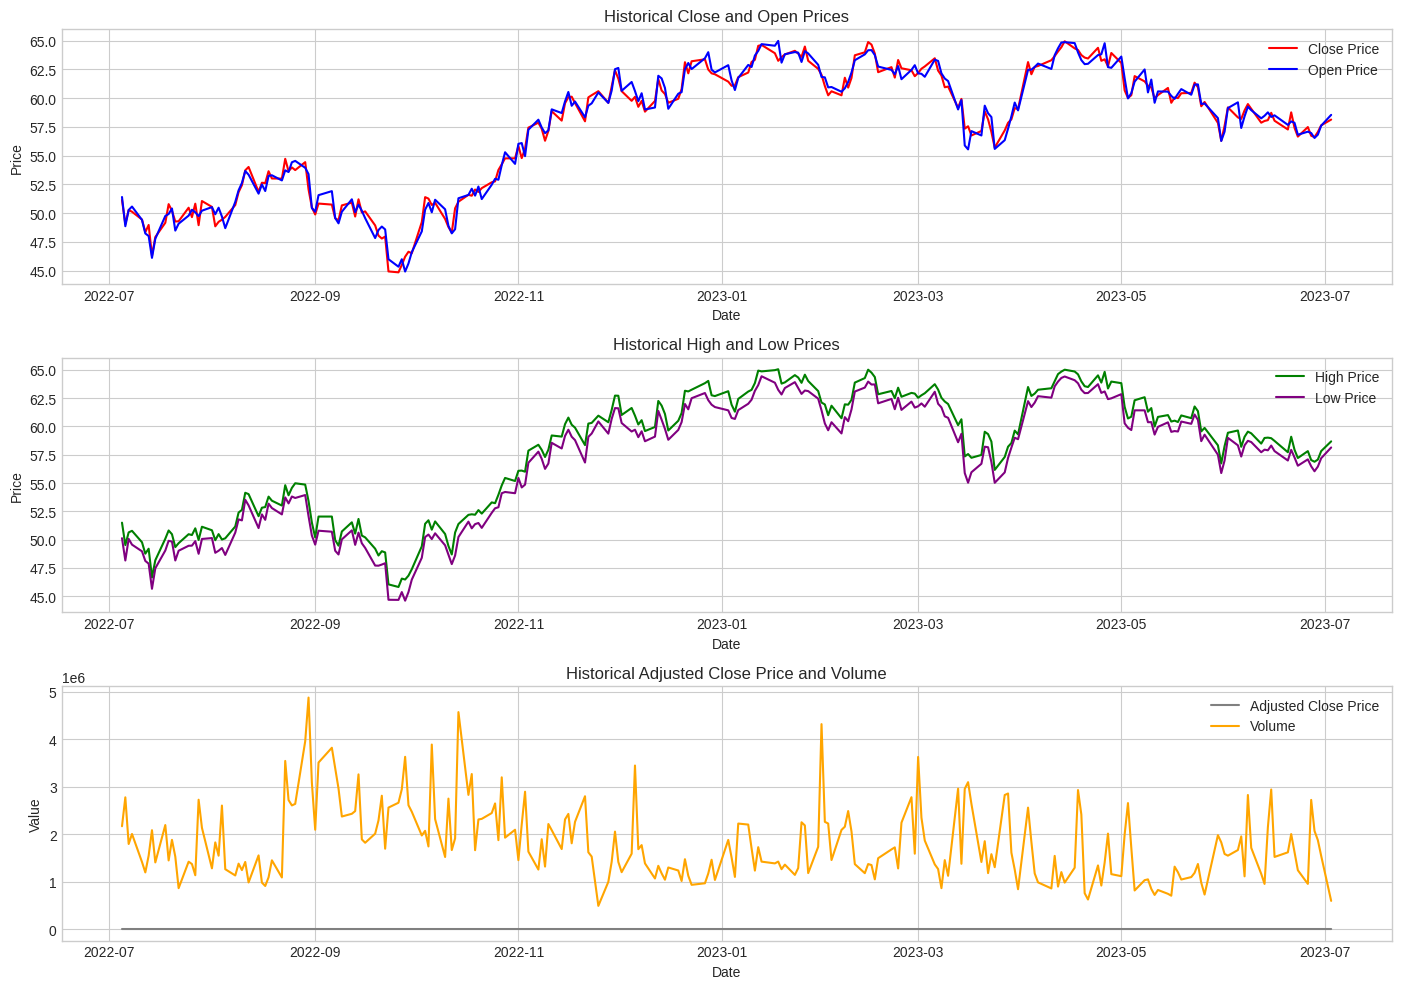

In [9]:
# Plotting el Precio de las acciones de Electrostocks:

def plot_stock_data(data):
    # Create subplots
    fig, axes = plt.subplots(3, 1, figsize=(14, 10))

    # Plot Close and Open Prices
    axes[0].plot(data["Date"], data["Close"], color="red", label="Close Price")
    axes[0].plot(data["Date"], data["Open"], color="blue", label="Open Price")
    axes[0].set_xlabel("Date")
    axes[0].set_ylabel("Price")
    axes[0].set_title("Historical Close and Open Prices")
    axes[0].legend()

    # Plot High and Low Prices
    axes[1].plot(data["Date"], data["High"], color="green", label="High Price")
    axes[1].plot(data["Date"], data["Low"], color="purple", label="Low Price")
    axes[1].set_xlabel("Date")
    axes[1].set_ylabel("Price")
    axes[1].set_title("Historical High and Low Prices")
    axes[1].legend()

    # Plot Adj Close and Volume
    axes[2].plot(data["Date"], data["Adj Close"], color="grey", label="Adjusted Close Price")
    axes[2].plot(data["Date"], data["Volume"], color="orange", label="Volume")
    axes[2].set_xlabel("Date")
    axes[2].set_ylabel("Value")
    axes[2].set_title("Historical Adjusted Close Price and Volume")
    axes[2].legend()

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()

# Usage example
plot_stock_data(acc_df)



In [10]:
# Elimino las columnas que no necesito
prop_df = acc_df.drop(['Open', 'High', 'Low','Adj Close', 'Volume'], axis=1)
prop_df.head()

,Date,Close
0,2022-07-05,51.150002
1,2022-07-06,49.060001
2,2022-07-07,50.279999
3,2022-07-08,50.130001
4,2022-07-11,49.450001


In [11]:
def preprocess_data(prop_df):
    # We have duplicates, so we need to de-duplicate it - grabbing first value that pops up for a time series
    prop_df.sort_index()
    prop_df = prop_df.groupby(prop_df.index).first()

    #Set freq to H
    df = prop_df.asfreq('H')

    return df


In [12]:
prop_df

,Date,Close
0,2022-07-05,51.150002
1,2022-07-06,49.060001
2,2022-07-07,50.279999
3,2022-07-08,50.130001
4,2022-07-11,49.450001
...,...,...
246,2023-06-27,56.730000
247,2023-06-28,56.619999
248,2023-06-29,57.060001
249,2023-06-30,57.639999


Pasos para utilizar Prophet:

Reemplazo el precio de cierre (Close) por "y" y la fecha (Date) por "ds".
Ajusto el dataframe a Prophet para detectar patrones futuros.
Realizo una predicción de los precios máximos y mínimos del precio de cierre (Close).

In [14]:
#PROPHET
prop_df['ds'] = pd.to_datetime(prop_df['Date'])
prop_df['year'] = prop_df['ds'].dt.year
prop_df['month'] = prop_df['ds'].dt.month
prop_df

,Date,Close,ds,year,month
0,2022-07-05,51.150002,2022-07-05,2022,7
1,2022-07-06,49.060001,2022-07-06,2022,7
2,2022-07-07,50.279999,2022-07-07,2022,7
3,2022-07-08,50.130001,2022-07-08,2022,7
4,2022-07-11,49.450001,2022-07-11,2022,7
...,...,...,...,...,...
246,2023-06-27,56.730000,2023-06-27,2023,6
247,2023-06-28,56.619999,2023-06-28,2023,6
248,2023-06-29,57.060001,2023-06-29,2023,6
249,2023-06-30,57.639999,2023-06-30,2023,6


# Visualizaciones

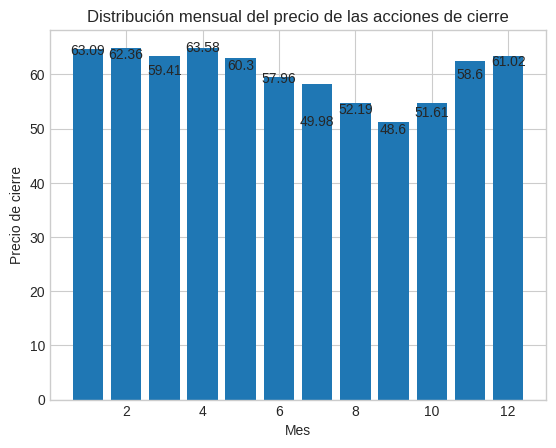

In [15]:
# Distribucion mensual

plt.bar(prop_df['month'], prop_df['Close'])
plt.xlabel('Mes')
plt.ylabel('Precio de cierre')
plt.title('Distribución mensual del precio de las acciones de cierre')

# Obtener el promedio mensual
df_month = prop_df.groupby('month')['Close'].mean().round(2).reset_index()

# Agregar el valor del promedio al final de cada barra
for i in range(len(df_month)):
    plt.text(df_month['month'][i], df_month['Close'][i], str(df_month['Close'][i]), ha='center', va='bottom')

plt.show()




Manipulacioón de los datos
Prophet requiere un formato específico de los datos

In [16]:
pass_prophet = prop_df[['ds', 'Close']]
pass_prophet = pass_prophet.rename(columns = {'Close':'y'})
pass_prophet.head(5)

,ds,y
0,2022-07-05,51.150002
1,2022-07-06,49.060001
2,2022-07-07,50.279999
3,2022-07-08,50.130001
4,2022-07-11,49.450001


In [29]:
pass_prophet.tail(5)

,ds,y
246,2023-06-27,56.730000
247,2023-06-28,56.619999
248,2023-06-29,57.060001
249,2023-06-30,57.639999
250,2023-07-03,58.139999


## Ajuste del modelo

In [17]:
m = Prophet()
m.fit(pass_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevtnh4ox/gwxo6qdh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevtnh4ox/70e0glq7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3328', 'data', 'file=/tmp/tmpevtnh4ox/gwxo6qdh.json', 'init=/tmp/tmpevtnh4ox/70e0glq7.json', 'output', 'file=/tmp/tmpevtnh4ox/prophet_modelgi2qd47r/prophet_model-20230723193820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Proyecciones

Primero, necesitamos generar el conjunto de datos con las fechas que queremos predecir. Estas fechas se incluirán en una columna llamada `ds` y las predicciones se agregarán a esta columna. El marco de datos se crea utilizando el método `Prophet.make_future_dataframe()`. De manera predeterminada, también incluirá las fechas históricas con las que entrenamos el modelo, por lo que podremos ver la calidad del ajuste del modelo.

In [18]:
# Proyectamos a un año vista

future_df = m.make_future_dataframe(periods=365) # make an extra year
future_df

,ds
0,2022-07-05
1,2022-07-06
2,2022-07-07
3,2022-07-08
4,2022-07-11
...,...
611,2024-06-28
612,2024-06-29
613,2024-06-30
614,2024-07-01


In [19]:
forecast_df = m.predict(future_df)

display(forecast_df.head(5))
display(forecast_df.tail(5))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-05,50.317282,47.891868,52.741832,50.317282,50.317282,-0.035749,-0.035749,-0.035749,-0.035749,-0.035749,-0.035749,0.0,0.0,0.0,50.281533
1,2022-07-06,50.319965,47.634645,52.511131,50.319965,50.319965,-0.207959,-0.207959,-0.207959,-0.207959,-0.207959,-0.207959,0.0,0.0,0.0,50.112005
2,2022-07-07,50.322647,47.654819,52.401618,50.322647,50.322647,-0.254030,-0.254030,-0.254030,-0.254030,-0.254030,-0.254030,0.0,0.0,0.0,50.068617
3,2022-07-08,50.325329,47.678861,52.760382,50.325329,50.325329,-0.109496,-0.109496,-0.109496,-0.109496,-0.109496,-0.109496,0.0,0.0,0.0,50.215833
4,2022-07-11,50.333377,47.558236,52.882036,50.333377,50.333377,-0.151676,-0.151676,-0.151676,-0.151676,-0.151676,-0.151676,0.0,0.0,0.0,50.181701


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
611,2024-06-28,40.376365,12.603390,66.414932,12.055963,66.705382,-0.109496,-0.109496,-0.109496,-0.109496,-0.109496,-0.109496,0.0,0.0,0.0,40.266869
612,2024-06-29,40.328023,12.368908,67.143208,11.890947,66.747991,0.379455,0.379455,0.379455,0.379455,0.379455,0.379455,0.0,0.0,0.0,40.707478
613,2024-06-30,40.279680,12.546981,67.538168,11.720827,66.790599,0.379455,0.379455,0.379455,0.379455,0.379455,0.379455,0.0,0.0,0.0,40.659135
614,2024-07-01,40.231338,11.254695,66.703730,11.554258,66.855073,-0.151676,-0.151676,-0.151676,-0.151676,-0.151676,-0.151676,0.0,0.0,0.0,40.079662
615,2024-07-02,40.182995,11.910822,66.655496,11.402147,67.088999,-0.035749,-0.035749,-0.035749,-0.035749,-0.035749,-0.035749,0.0,0.0,0.0,40.147246


In [20]:
forecast_clean = forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_clean

,ds,yhat,yhat_lower,yhat_upper
0,2022-07-05,50.281533,47.891868,52.741832
1,2022-07-06,50.112005,47.634645,52.511131
2,2022-07-07,50.068617,47.654819,52.401618
3,2022-07-08,50.215833,47.678861,52.760382
4,2022-07-11,50.181701,47.558236,52.882036
...,...,...,...,...
611,2024-06-28,40.266869,12.603390,66.414932
612,2024-06-29,40.707478,12.368908,67.143208
613,2024-06-30,40.659135,12.546981,67.538168
614,2024-07-01,40.079662,11.254695,66.703730


 ## Representar los resultados

In [21]:
plot_plotly(m, forecast_df)

Observamos que los intervalos de confianza (yhat_lower y yhat_upper)  en el forecast son amplios y se extienden significativamente desde el 2023-08, esto puede indicar una mayor incertidumbre y falta de precisión en el pronóstico.

 ## Descomposición de los resultados

Si deseamos ver los componentes del pronóstico, podemos utilizar el método `Prophet.plot_components()`. De manera predeterminada, se mostrarán la tendencia y las estacionalidades de la serie temporal. Si se incluyen días festivos, también aparecerán en el gráfico.

In [22]:
plot_components_plotly(m, forecast_df)

Tendencias (Trend):
El precio de las acciones de Electrostock muestra signos de una tendencia bajista desde 17 de enero 2023 (el consumo del mes de diciembre tienden a impulsar el precio de las acciones).
No hay una tendencia semanal en los precios de las acciones.

In [23]:
lowest_price = acc_df['Close'].min()
lowest_price_date = acc_df.loc[acc_df['Close'] == lowest_price, 'Date'].values[0]

print(lowest_price_date, lowest_price)


2022-09-26T00:00:00.000000000 44.860001


In [24]:
highest_price = acc_df['Close'].max()
highest_price_date = acc_df.loc[acc_df['Close'] == highest_price, 'Date'].values[0]

print(highest_price_date, highest_price)


2023-04-14T00:00:00.000000000 64.949997


Entrenamiento y Evaluación

In [30]:
train_df = pass_prophet.loc[pass_prophet['ds'] < '2023-03-01']
test_df = pass_prophet.loc[pass_prophet['ds'] >= '2023-03-01']

In [31]:
model_ml = Prophet(interval_width = 0.9, weekly_seasonality = True)
model_ml.fit(train_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevtnh4ox/ai3lnm0z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevtnh4ox/a1ylfago.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33779', 'data', 'file=/tmp/tmpevtnh4ox/ai3lnm0z.json', 'init=/tmp/tmpevtnh4ox/a1ylfago.json', 'output', 'file=/tmp/tmpevtnh4ox/prophet_modelh7uwoznz/prophet_model-20230723195424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:54:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:54:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [36]:
future_ml_df = model_ml.make_future_dataframe(periods =len(test_df)+12, freq = 'MS')
future_ml_df

,ds
0,2022-07-05
1,2022-07-06
2,2022-07-07
3,2022-07-08
4,2022-07-11
...,...
258,2030-12-01
259,2031-01-01
260,2031-02-01
261,2031-03-01


In [40]:
future_ml_df = model_ml.make_future_dataframe(periods=len(test_df) + 365, freq='D')
future_ml_df

,ds
0,2022-07-05
1,2022-07-06
2,2022-07-07
3,2022-07-08
4,2022-07-11
...,...
611,2024-05-20
612,2024-05-21
613,2024-05-22
614,2024-05-23


In [41]:
# Concatenate datasets to compare in-and-out samples

px.line(pd.concat([pass_prophet.set_index('ds')['y'], forecast_ml_df.set_index('ds')['yhat']], axis = 1), title = 'Proyecciones con Prophet - Estacionalidad aditiva')

# Incluyendo más complejidad...

## Estacionalidad

In [42]:
m_pax_mul = Prophet(seasonality_mode='multiplicative', weekly_seasonality=True)
m_pax_mul.fit(pass_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevtnh4ox/dwk768re.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevtnh4ox/tyuhx9hb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52596', 'data', 'file=/tmp/tmpevtnh4ox/dwk768re.json', 'init=/tmp/tmpevtnh4ox/tyuhx9hb.json', 'output', 'file=/tmp/tmpevtnh4ox/prophet_modelul4jjo2v/prophet_model-20230723200043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:00:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:00:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [43]:
future_pax_mul = m_pax_mul.make_future_dataframe(365, freq='D')
display(future_pax_mul.head(10))
display(future_pax_mul.tail(10))

,ds
0,2022-07-05
1,2022-07-06
2,2022-07-07
3,2022-07-08
4,2022-07-11
5,2022-07-12
6,2022-07-13
7,2022-07-14
8,2022-07-15
9,2022-07-18


,ds
606,2024-06-23
607,2024-06-24
608,2024-06-25
609,2024-06-26
610,2024-06-27
611,2024-06-28
612,2024-06-29
613,2024-06-30
614,2024-07-01
615,2024-07-02


In [44]:
forecast_pax_mul = m_pax_mul.predict(future_pax_mul)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
px.line(pd.concat([pass_prophet.set_index('ds')['y'], forecast_pax_mul.set_index('ds')['yhat']], axis = 1), title = 'Proyecciones con Prophet - Estacionalidad multiplicativa')

## Evaluación

### Validación cruzada

In [75]:
cv_add = cross_validation(model=model_ml, initial='120 days', period='21 days', horizon='90 days')


INFO:prophet:Making 2 forecasts with cutoffs between 2022-11-09 00:00:00 and 2022-11-30 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpevtnh4ox/eevcsh2o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevtnh4ox/1ord__5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11694', 'data', 'file=/tmp/tmpevtnh4ox/eevcsh2o.json', 'init=/tmp/tmpevtnh4ox/1ord__5i.json', 'output', 'file=/tmp/tmpevtnh4ox/prophet_modeltgr53glb/prophet_model-20230723202940.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:29:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:29:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevtnh4ox/exc_y3tt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevtnh4ox/evxqfxvz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [77]:
cv_mul = cross_validation(model = m_pax_mul,  initial='120 days', period='21 days', horizon = '90 days' )

INFO:prophet:Making 8 forecasts with cutoffs between 2022-11-08 00:00:00 and 2023-04-04 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpevtnh4ox/__acvkfq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevtnh4ox/jpcnsmqv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80996', 'data', 'file=/tmp/tmpevtnh4ox/__acvkfq.json', 'init=/tmp/tmpevtnh4ox/jpcnsmqv.json', 'output', 'file=/tmp/tmpevtnh4ox/prophet_model7mn6d2yj/prophet_model-20230723203017.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:30:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:30:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevtnh4ox/u7d2p5t5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevtnh4ox/sp4t2gi4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [78]:
df_performance_add = performance_metrics(cv_add)
display(df_performance_add.head(10))

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,8 days,5.165139,2.272694,1.830959,0.030635,0.025723,0.030113,0.666667
1,9 days,7.427856,2.725409,2.270255,0.038106,0.028482,0.037275,0.583333
2,12 days,9.063995,3.010647,2.543115,0.042756,0.040807,0.041659,0.500000
3,13 days,9.168470,3.027948,2.549981,0.042728,0.041672,0.041623,0.500000
4,14 days,9.789466,3.128812,2.568822,0.042972,0.041672,0.041762,0.500000
5,15 days,10.870671,3.297070,2.727259,0.045538,0.057886,0.044160,0.458333
6,16 days,12.387774,3.519627,2.782516,0.046470,0.057886,0.044838,0.458333
7,19 days,13.881984,3.725854,2.982058,0.049737,0.061867,0.047887,0.458333
8,20 days,14.456520,3.802173,3.011308,0.049975,0.041672,0.048066,0.458333
9,21 days,14.034074,3.746208,2.957621,0.048807,0.042486,0.046978,0.458333


In [70]:
df_performance_mul = performance_metrics(cv_mul)

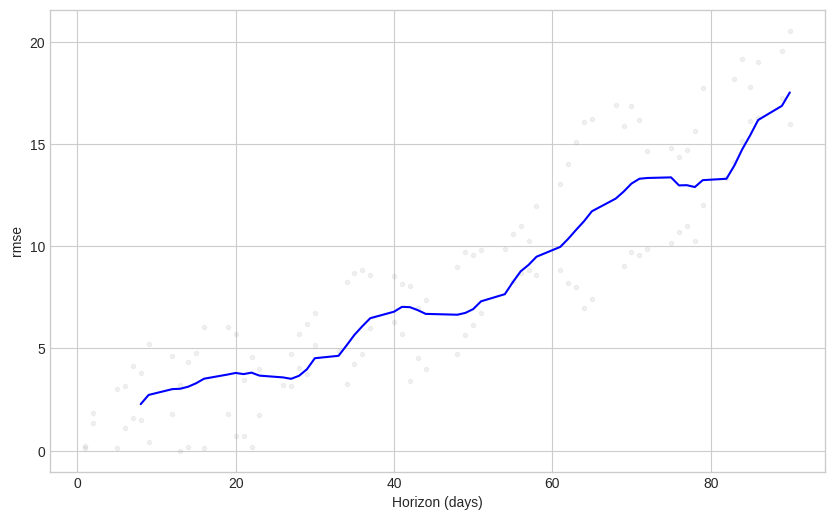

In [79]:
cv_plot = plot_cross_validation_metric(cv_add, metric = 'rmse')

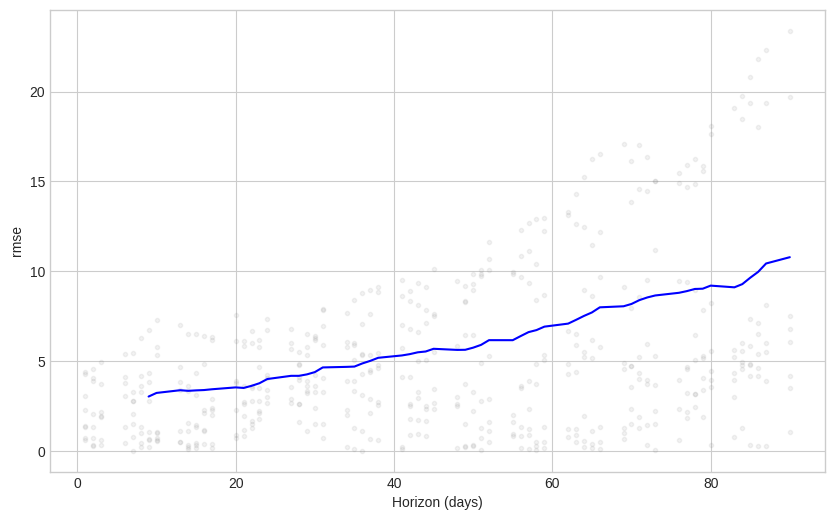

In [80]:
cv_plot_mul = plot_cross_validation_metric(cv_mul, metric = 'rmse')

In [81]:
df_performance_add.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
horizon,58,49 days 00:49:39.310344827,24 days 06:51:12.098050957,8 days 00:00:00,28 days 06:00:00,49 days 12:00:00,69 days 18:00:00,90 days 00:00:00
mse,58.0,88.651808,81.520609,5.165139,14.892615,49.436542,165.090495,307.624476
rmse,58.0,8.359222,4.370881,2.272694,3.858429,7.031109,12.84838,17.539227
mae,58.0,7.984458,4.456609,1.830959,3.329242,6.773601,12.360587,17.439742
mape,58.0,0.128252,0.070691,0.030635,0.05401,0.110361,0.197679,0.282403
mdape,58.0,0.128861,0.072899,0.025723,0.062145,0.109898,0.194635,0.283852
smape,58.0,0.117932,0.061651,0.030113,0.052247,0.104203,0.179043,0.247184
coverage,58.0,0.193966,0.193011,0.0,0.0,0.125,0.333333,0.666667


In [82]:
df_performance_mul.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
horizon,58,49 days 07:02:04.137931034,23 days 15:52:21.494056073,9 days 00:00:00,29 days 06:00:00,49 days 12:00:00,69 days 18:00:00,90 days 00:00:00
mse,58.0,42.957954,29.730125,6.125205,18.901949,31.87936,62.541534,109.834062
rmse,58.0,6.157222,2.266076,2.474915,4.347402,5.645351,7.908166,10.480175
mae,58.0,5.036354,1.775391,1.890459,3.755902,4.840085,6.207358,8.453366
mape,58.0,0.082442,0.029057,0.031135,0.061344,0.07904,0.101564,0.138583
mdape,58.0,0.070629,0.021963,0.022481,0.058924,0.075122,0.083594,0.103166
smape,58.0,0.078413,0.025634,0.030916,0.060537,0.076349,0.094993,0.12689
coverage,58.0,0.571457,0.152031,0.347354,0.435889,0.540536,0.731089,0.804904


En general, el modelo multiplicativo muestra un rendimiento superior en la mayoría de las métricas evaluadas.

La cobertura de intervalo del m. multiplicativo tiene un promedio de 57.15%, que es más alta que la del modelo aditivo, lo que indica una mejor capacidad del modelo para capturar la incertidumbre en las predicciones.

## Añadiendo vacaciones

In [86]:
!pip install fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (44.4 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached marshmallow-3.20.1-py3-none-any.whl (49 kB)
  Using cached webargs-8.3.0-py3-none-any.whl (31 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and

In [87]:
from distributed.worker import P
Prop_hols = Prophet().add_country_holidays(country_name='ES')
prop_hols.fit(prop_df)

ImportError: ignored

No continue con el analisis porque no se instala la libreria